In [2]:
import os
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import math
import sys
import os
sys.path.append(os.path.abspath("../"))

#Get the ISO-Codes
iso = pd.read_csv("../Data/ISO/ISO.csv")

#Get the Functions
from Functions.pagerank import calculate_pagerank
from Functions.data_handling import load_network_dataframes, filter_dataframes_by_period 
from Functions.network_viz import visualize_network

In [3]:
# Load the network dataframes
csv_filenames = ['../Data/Networks/W_1_ij.csv', '../Data/Networks/W_2_ij.csv', '../Data/Networks/W_3_ij.csv']
W_ij_dataframes = load_network_dataframes(csv_filenames)


Loading W_ij Dataframes from CSV files...
Loaded ../Data/Networks/W_1_ij.csv as W_1_ij
Loaded ../Data/Networks/W_2_ij.csv as W_2_ij
Loaded ../Data/Networks/W_3_ij.csv as W_3_ij


In [4]:
# Define the desired start and end periods for filtering
start_period = 1989 
end_period = 2020  
W_ij_dataframes = filter_dataframes_by_period(W_ij_dataframes, start_period, end_period)


Filtering DataFrames for periods between 1989 and 2020...
Filtered W_1_ij. Original rows: 81353, Filtered rows: 69127
Filtered W_2_ij. Original rows: 34585, Filtered rows: 29382
Filtered W_3_ij. Original rows: 94775, Filtered rows: 78649


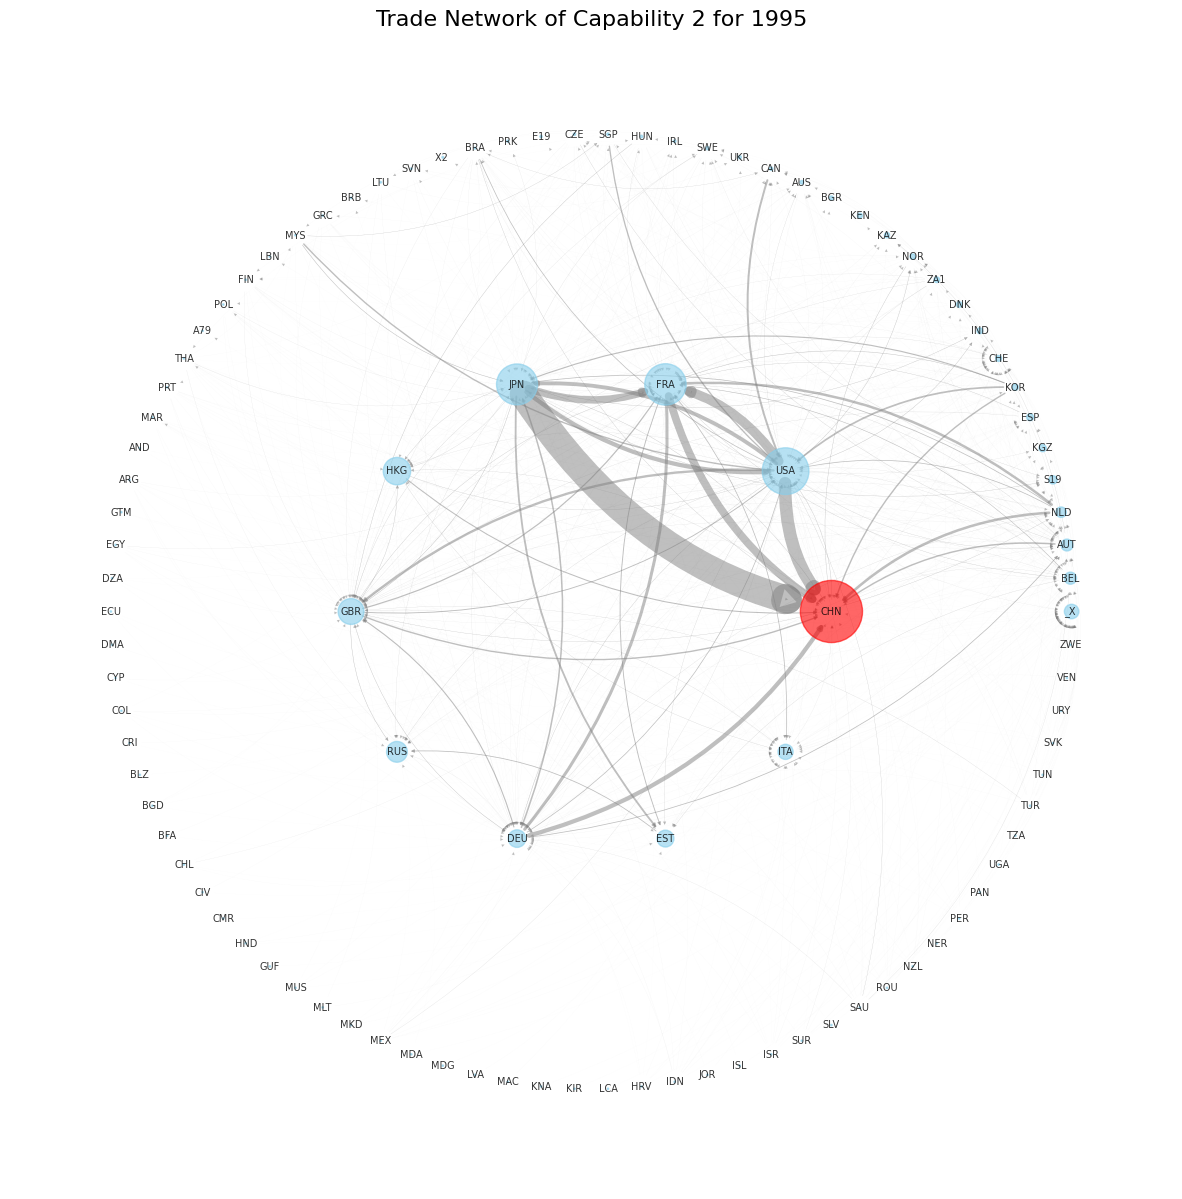

In [5]:
period_val = 1995
cap = 2

#Filter the dataframe for the specific period
TN_t_c = W_ij_dataframes[f"W_{cap}_ij"][W_ij_dataframes[f"W_{cap}_ij"]["period"] == period_val]

#Calculate PageRank
pagerank_TN_t_c= calculate_pagerank(TN_t_c)

# Visualize the 2002 network with custom layout
visualize_network(TN_t_c, pagerank_TN_t_c, top_n=10, period_val = period_val, cap=cap) # Adjusted top_n to 3 due to small sample size